In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,HashingVectorizer
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import pandas as pd
df = pd.read_csv('yourpath.csv')

In [2]:
# Drop unnecessary columns from df3
df1 = df.drop(['rating', 'reviewerName', 'unixReviewTime', 'title', 'description', 'category', 'price', 'imageURL','review_length','imageURLHighRes','also_buy','similar_item','also_view','rank',
              'main_cat', 'fit','tech2', 'tech1','details','date'], axis=1)

# Display the first few rows of the new DataFrame to verify the changes
df1.head()


,verified,reviewerID,product_id,brand,feature,review_text,rating_class,time,cleaned_review_text
0,False,A3OFBEIYJGHRV6,B00006Z95D,Jabra,['Headset works with most bluetooth phones (ho...,An awesome headset! I am using the FreeSpeak f...,good,2002-12-23,awesome headset using FreeSpeak nonBluetooth p...
1,True,AYID3D29GWY6N,B00006Z95D,Jabra,['Headset works with most bluetooth phones (ho...,Doesn't work as well as I hoped... For the pri...,good,2002-10-23,work well hoped price guess say ok deal since ...
2,True,A3LE6KDCI29ABR,B00006Z95D,Jabra,['Headset works with most bluetooth phones (ho...,"Great idea, could be better First off, the hea...",good,2003-11-05,Great idea could better First headset purchase...
3,False,AJTUTIPTJTB3M,B00006Z95D,Jabra,['Headset works with most bluetooth phones (ho...,Confirming: DOES NOT WORK WITH 3650!! It has a...,bad,2003-07-21,Confirming WORK series flaky behavior nominall...
4,True,AV8MDYLHHTUOY,B00006Z95D,Jabra,['Headset works with most bluetooth phones (ho...,Works with 3650? Don't believe it!!! I purchas...,bad,2003-07-03,Works believe purchased item recently use Noki...


In [3]:
df1.isnull().sum()

verified               0
reviewerID             0
product_id             0
brand                  0
feature                0
review_text            0
rating_class           0
time                   0
cleaned_review_text    1
dtype: int64

In [4]:
df1.to_csv('yourpath.csv', sep=',', encoding='utf-8', index = False)

In [4]:
def tokenize_text(text):
    if isinstance(text, float):  # Check if the entry is a float (NaN or similar)
        return []
    return word_tokenize(text)

# Fill NaN values with an empty string
df1['cleaned_review_text'] = df1['cleaned_review_text'].fillna('')

# Apply the function to create a 'tokens' column
df1['tokens'] = df1['cleaned_review_text'].apply(tokenize_text)

# Display the first few rows to verify
df1[['tokens']].head()

,tokens
0,"[awesome, headset, using, FreeSpeak, nonBlueto..."
1,"[work, well, hoped, price, guess, say, ok, dea..."
2,"[Great, idea, could, better, First, headset, p..."
3,"[Confirming, WORK, series, flaky, behavior, no..."
4,"[Works, believe, purchased, item, recently, us..."


In [5]:
# Converting 'rating_class' to numerical values
df1['rating_class'] = df1['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

# Separating the response variable and feature
X = df1['cleaned_review_text']
y = df1['rating_class']

# Ensure all entries in 'cleaned_review_text' are strings
X = X.astype(str)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Check the distribution of classes
print("Training set class distribution:")
print(y_train.value_counts())
print("Test set class distribution:")
print(y_test.value_counts())

Training set class distribution:
1    15417
0     3279
Name: rating_class, dtype: int64
Test set class distribution:
1    3862
0     812
Name: rating_class, dtype: int64


In [5]:
count_vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_count = count_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_count = count_vectorizer.transform(X_test)

# Display the shape of the resulting matrices
print(f"Shape of X_train_count: {X_train_count.shape}")
print(f"Shape of X_test_count: {X_test_count.shape}")

Shape of X_train_count: (18696, 22281)
Shape of X_test_count: (4674, 22281)


In [29]:
# Initialize CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))

# Fit and transform the training data
X_train_count = count_vect.fit_transform(X_train)

# Transform the test data
X_test_count = count_vect.transform(X_test)

# Apply TruncatedSVD to the CountVectorizer results
svd = TruncatedSVD(n_components=100)  # Adjust the number of components as needed
X_train_count_svd = svd.fit_transform(X_train_count)
X_test_count_svd = svd.transform(X_test_count)

# Print the shape of the resulting matrices
print(f"Shape of X_train_count_svd: {X_train_count_svd.shape}")
print(f"Shape of X_test_count_svd: {X_test_count_svd.shape}")


Shape of X_train_count_svd: (18696, 100)
Shape of X_test_count_svd: (4674, 100)


In [7]:
count_vectorizer = CountVectorizer()
count_vect = CountVectorizer(ngram_range=(1,1))

# Fit and transform the training data
X_train_count_svd = count_vect.fit_transform(X_train).toarray()

# Transform the test data
X_test_count_svd = count_vect.transform(X_test).toarray()


In [8]:
count_vect = CountVectorizer(ngram_range=(1,1))

# Fit and transform the training data
count_vect_train = count_vect.fit_transform(X_train).toarray()

# Transform the test data
count_vect_test = count_vect.transform(X_test).toarray()

# Print vocabulary length
vocab_length = len(count_vect.get_feature_names_out())
print('Vocabulary length:', vocab_length)

# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names_out()

# DataFrame for train CountVectorizer dataset
count_vect_train_df = pd.DataFrame(count_vect_train, columns=vocab)

# Display the first few rows of the DataFrame
count_vect_train_df.head()

Vocabulary length: 22281


,____,________,_____________,_______________,________________________________________,_______________________________________________________________________________________________________________________________________,_away_,_did,_four_,_loudest_,...,zthe,zune,zve,zvl,zvolt,zvr,zx,zxr,zyxel,zzolt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [8]:
# Initialize IncrementalPCA with 100 components
n_components = 100
incremental_pca = IncrementalPCA(n_components=n_components)

# Fit IncrementalPCA to the training data in chunks
for X_chunk in np.array_split(X_train_tfidf.toarray(), 10):
    incremental_pca.partial_fit(X_chunk)

# Transform the training data in chunks
X_train_tfidf_pca = np.vstack([incremental_pca.transform(X_chunk) for X_chunk in np.array_split(X_train_tfidf.toarray(), 10)])

# Transform the test data
X_test_tfidf_pca = incremental_pca.transform(X_test_tfidf.toarray())

# Print the shape of the resulting matrices
print(f"Shape of X_train_tfidf_pca: {X_train_tfidf_pca.shape}")
print(f"Shape of X_test_tfidf_pca: {X_test_tfidf_pca.shape}")


Shape of X_train_tfidf_pca: (18696, 100)
Shape of X_test_tfidf_pca: (4674, 100)


In [9]:
# Initialize CountVectorizer
count_vect = CountVectorizer(ngram_range=(1, 1))

# Fit and transform the training data
X_train_count = count_vect.fit_transform(X_train)

# Transform the test data
X_test_count = count_vect.transform(X_test)


In [10]:
# Initialize TruncatedSVD with 100 components
svd = TruncatedSVD(n_components=100)

# Fit and transform the training data
X_train_count_svd = svd.fit_transform(X_train_count)

# Transform the test data
X_test_count_svd = svd.transform(X_test_count)

# Print the shape of the resulting matrices
print(f"Shape of X_train_count_svd: {X_train_count_svd.shape}")
print(f"Shape of X_test_count_svd: {X_test_count_svd.shape}")


Shape of X_train_count_svd: (18696, 100)
Shape of X_test_count_svd: (4674, 100)


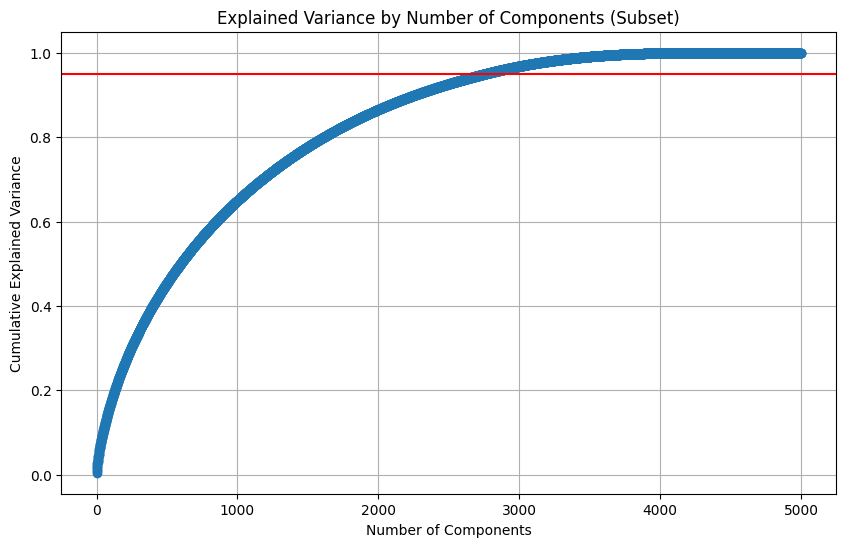

Number of components that capture at least 95% of the variance: 2760


In [8]:
# Use a smaller subset
subset_size = 5000
X_train_subset = X_train_tfidf[:subset_size].toarray()

# Scale the subset data
scaler = StandardScaler()
X_train_subset_scaled = scaler.fit_transform(X_train_subset)

# Fit PCA with the subset to determine explained variance
pca = PCA().fit(X_train_subset_scaled)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title('Explained Variance by Number of Components (Subset)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Find the number of components that capture at least 95% of the variance
n_components = (cumulative_variance_ratio >= 0.95).argmax() + 1
print(f'Number of components that capture at least 95% of the variance: {n_components}')


## Due to the limitation in Memory, we continue with n_components=100 but accurate approach is 2760

In [8]:
# Scale the data
scaler = StandardScaler()
tfidf_vect_train_scaled = scaler.fit_transform(tfidf_vect_train)
tfidf_vect_test_scaled = scaler.transform(tfidf_vect_test)

# Apply PCA to the TF-IDF Vectorizer results
pca = PCA(n_components=100) 
X_train_tfidf_pca = pca.fit_transform(tfidf_vect_train_scaled)
X_test_tfidf_pca = pca.transform(tfidf_vect_test_scaled)

# Display the shape of the resulting matrices
print(f"Shape of X_train_tfidf_pca: {X_train_tfidf_pca.shape}")
print(f"Shape of X_test_tfidf_pca: {X_test_tfidf_pca.shape}")


Shape of X_train_tfidf_pca: (18696, 100)
Shape of X_test_tfidf_pca: (4674, 100)


In [11]:
# Initialize HashingVectorizer
hash_vectorizer = HashingVectorizer()  

# Fit and transform the training data
X_train_hash = hash_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_hash = hash_vectorizer.transform(X_test)

# Display the shape of the resulting matrices
print(f"Shape of X_train_hash: {X_train_hash.shape}")
print(f"Shape of X_test_hash: {X_test_hash.shape}")


Shape of X_train_hash: (18696, 1048576)
Shape of X_test_hash: (4674, 1048576)


In [12]:

# Apply Truncated SVD to HashingVectorizer results
svd = TruncatedSVD(n_components=100) 
X_train_hash_svd = svd.fit_transform(X_train_hash)
X_test_hash_svd = svd.transform(X_test_hash)

# Display the shape of the resulting matrices
print(f"Shape of X_train_hash_svd: {X_train_hash_svd.shape}")
print(f"Shape of X_test_hash_svd: {X_test_hash_svd.shape}")


Shape of X_train_hash_svd: (18696, 100)
Shape of X_test_hash_svd: (4674, 100)


In [20]:
# Define a function to run the model and print results
def modeling(Model, Xtrain, Xtest, y_train, y_test):
    """
    This function applies different methods with machine learning algorithms.
    """
    # Instantiate the classifier
    model = Model
    
    # Fit the classifier to the training data
    model.fit(Xtrain, y_train)
    
    # Predict the test set results
    y_pred = model.predict(Xtest)
    
    # Calculate and print the f1 score
    score = f1_score(y_test, y_pred, average='weighted')
    print(f"f1 score: {score:.4f}")
    
    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

# List of models to evaluate (exclude MultinomialNB for PCA-transformed data)
models = [
    LogisticRegression(max_iter=200),
    RandomForestClassifier(),
    GaussianNB()
]



Model: LogisticRegression
f1 score: 0.8811
Confusion Matrix:
[[ 390  422]
 [  77 3785]]


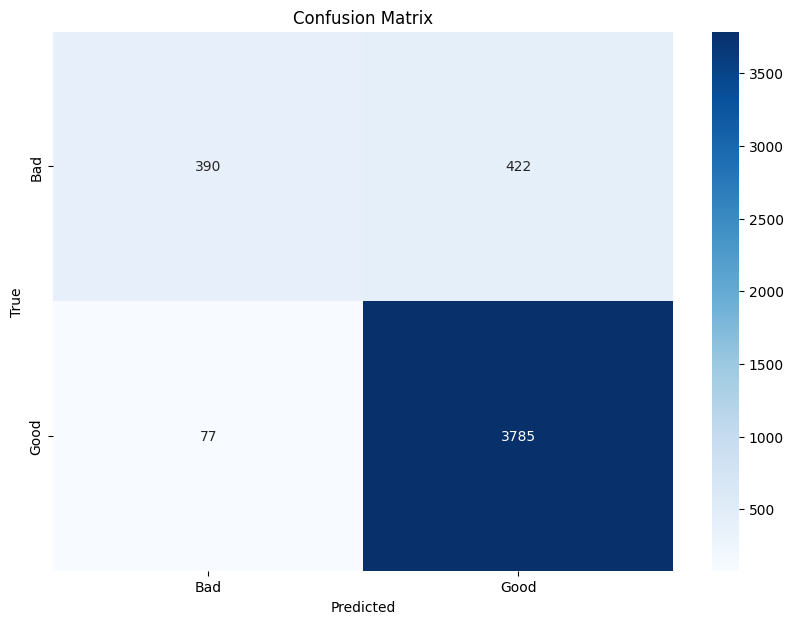

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.48      0.61       812
           1       0.90      0.98      0.94      3862

    accuracy                           0.89      4674
   macro avg       0.87      0.73      0.77      4674
weighted avg       0.89      0.89      0.88      4674


Model: RandomForestClassifier
f1 score: 0.8557
Confusion Matrix:
[[ 277  535]
 [  29 3833]]


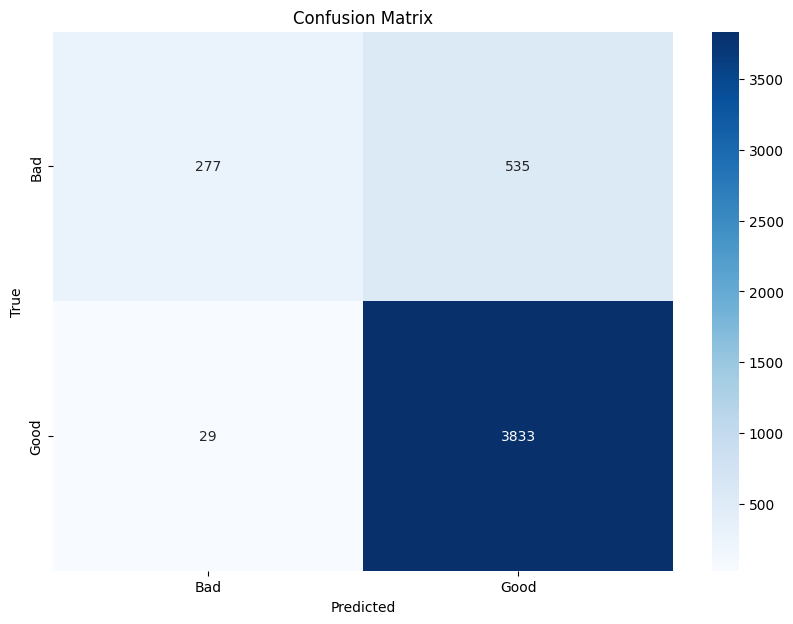

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.34      0.50       812
           1       0.88      0.99      0.93      3862

    accuracy                           0.88      4674
   macro avg       0.89      0.67      0.71      4674
weighted avg       0.88      0.88      0.86      4674


Model: GaussianNB
f1 score: 0.7345
Confusion Matrix:
[[ 701  111]
 [1300 2562]]


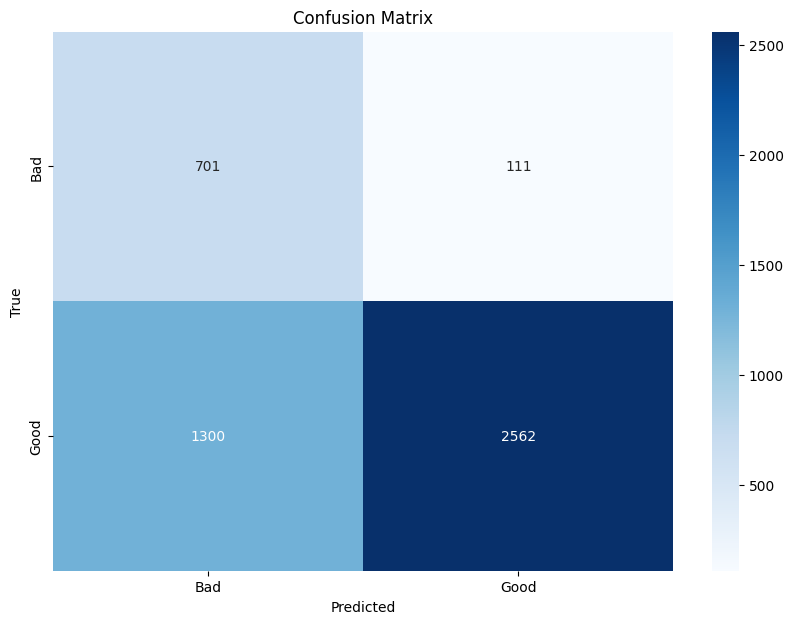

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.86      0.50       812
           1       0.96      0.66      0.78      3862

    accuracy                           0.70      4674
   macro avg       0.65      0.76      0.64      4674
weighted avg       0.85      0.70      0.73      4674



In [21]:
# Run modeling for TFIDF Vectorizer
for model in models:
    print(f"\nModel: {model.__class__.__name__}")
    modeling(model, X_train_tfidf_pca, X_test_tfidf_pca, y_train, y_test)



Model: LogisticRegression
f1 score: 0.8496
Confusion Matrix:
[[ 325  487]
 [ 145 3717]]


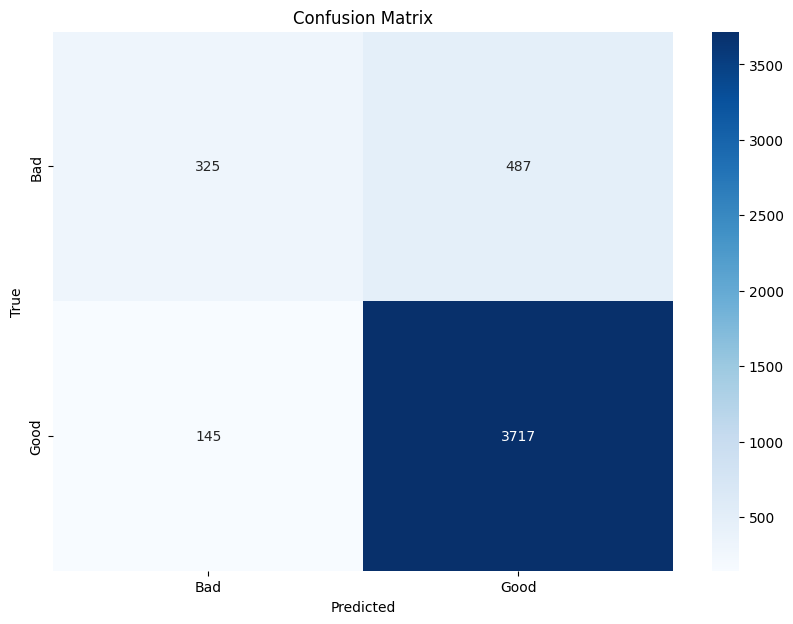

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.40      0.51       812
           1       0.88      0.96      0.92      3862

    accuracy                           0.86      4674
   macro avg       0.79      0.68      0.71      4674
weighted avg       0.85      0.86      0.85      4674


Model: RandomForestClassifier
f1 score: 0.8179
Confusion Matrix:
[[ 164  648]
 [  17 3845]]


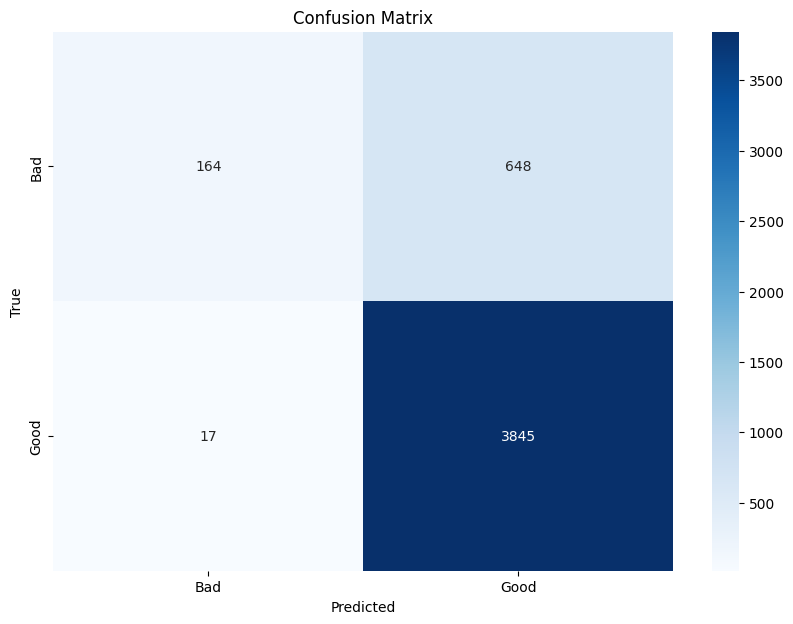

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.20      0.33       812
           1       0.86      1.00      0.92      3862

    accuracy                           0.86      4674
   macro avg       0.88      0.60      0.63      4674
weighted avg       0.86      0.86      0.82      4674


Model: GaussianNB
f1 score: 0.5242
Confusion Matrix:
[[ 636  176]
 [2281 1581]]


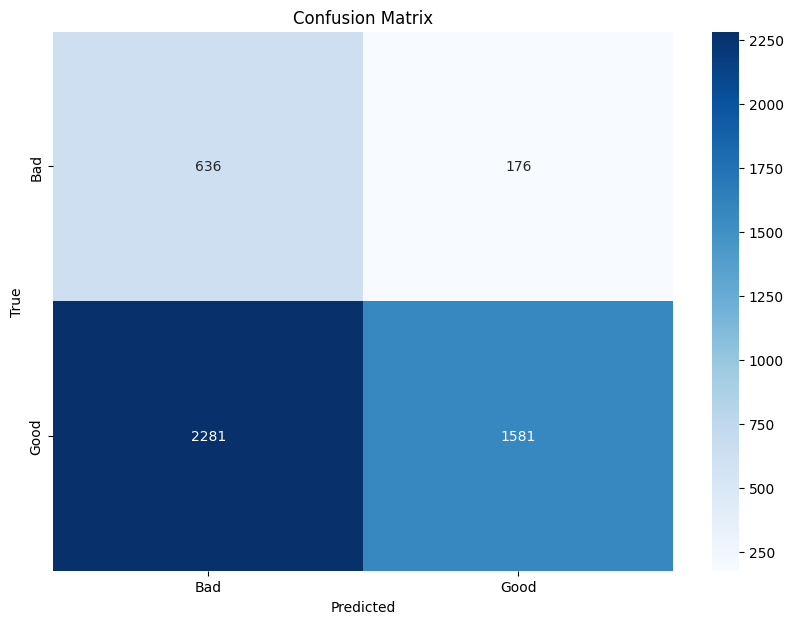

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.78      0.34       812
           1       0.90      0.41      0.56      3862

    accuracy                           0.47      4674
   macro avg       0.56      0.60      0.45      4674
weighted avg       0.78      0.47      0.52      4674



In [22]:
for model in models:
    print(f"\nModel: {model.__class__.__name__}")
    modeling(model, X_train_count_svd, X_test_count_svd, y_train, y_test)



Model: LogisticRegression
f1 score: 0.8732
Confusion Matrix:
[[ 384  428]
 [ 110 3752]]


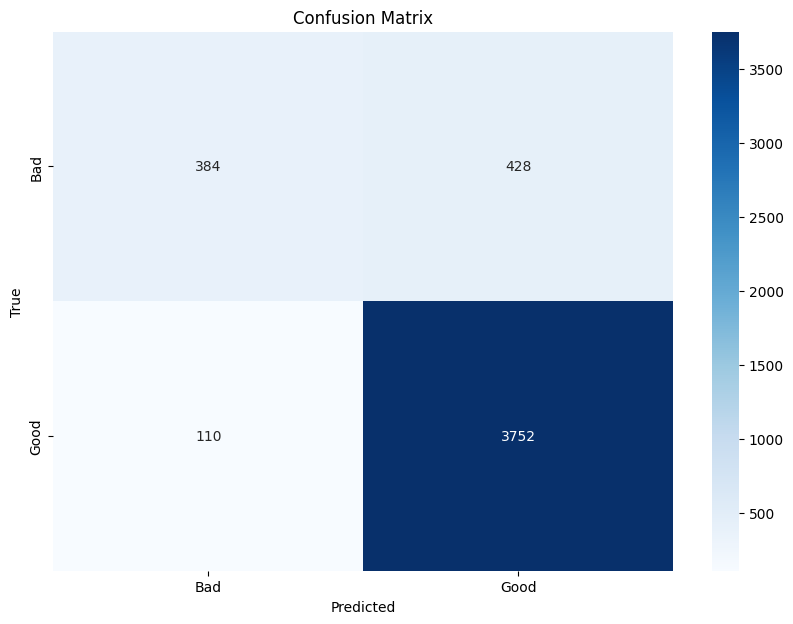

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.47      0.59       812
           1       0.90      0.97      0.93      3862

    accuracy                           0.88      4674
   macro avg       0.84      0.72      0.76      4674
weighted avg       0.88      0.88      0.87      4674


Model: RandomForestClassifier
f1 score: 0.8414
Confusion Matrix:
[[ 237  575]
 [  34 3828]]


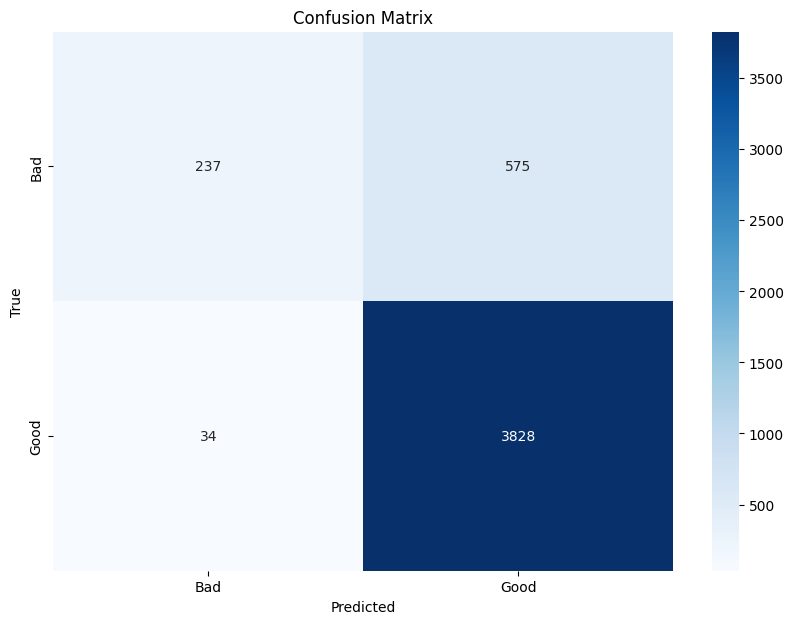

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.29      0.44       812
           1       0.87      0.99      0.93      3862

    accuracy                           0.87      4674
   macro avg       0.87      0.64      0.68      4674
weighted avg       0.87      0.87      0.84      4674


Model: GaussianNB
f1 score: 0.7833
Confusion Matrix:
[[ 525  287]
 [ 822 3040]]


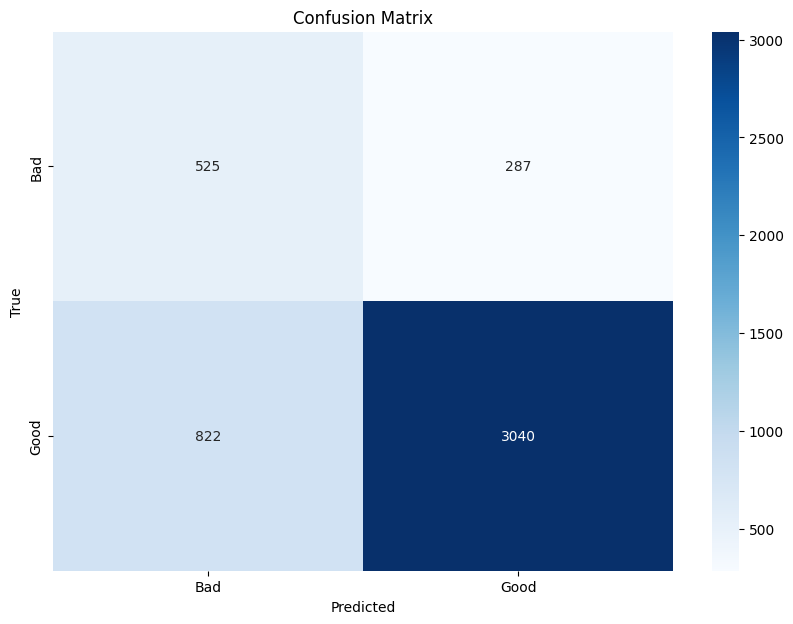

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.65      0.49       812
           1       0.91      0.79      0.85      3862

    accuracy                           0.76      4674
   macro avg       0.65      0.72      0.67      4674
weighted avg       0.82      0.76      0.78      4674



In [23]:
# Run modeling for Hashing Vectorizer
for model in models:
    print(f"\nModel: {model.__class__.__name__}")
    modeling(model, X_train_hash_svd, X_test_hash_svd, y_train, y_test)